<a href="https://colab.research.google.com/github/hifsakazmi/xai_ml_robot_telemetry/blob/main/AAI_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Data Preprocessing


### 1.1 Loading Data and Initial Exploration

#### Download Dataset

In [220]:
import os
import zipfile
import gdown

In [221]:
def download_dataset(dataset_link):
  local_path = "/content"  # This is where files get extracted
  zip_path = "/content/drone_dataset.zip"
  dataset_path = "/content/drone_dataset"

  if not os.path.exists(dataset_path):
    print("Downloading dataset from Google Drive...")

    # Download the file
    print("Downloading zip file...")
    gdown.download(dataset_link, zip_path, quiet=False)

    # Check if download was successful
    if not os.path.exists(zip_path):
      raise FileNotFoundError(f"Download failed! Zip file not found at {zip_path}")

    # Extract the zip file
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(local_path)

    os.remove(zip_path)
    print("Dataset downloaded and extracted successfully!")
  else:
    print("Dataset already exists!")
  return dataset_path

In [222]:
dataset_link = 'https://drive.google.com/uc?id=1RLkIm9UwxqQiFXrR96ixikb4jYCIBQau'
dataset_path = download_dataset(dataset_link)
os.listdir(dataset_path)



Dataset already exists!


['Malfunction-Drone', 'Dos-Drone', 'ReadMeForDataSet.txt', 'NormalFlight']

#### Load Data in Dataframes

In [223]:
import pandas as pd
import numpy as np

In [224]:
global_flight_id = 0
def load_all_csvs_from_dir(directory_path):
  global global_flight_id
  all_dataframes = []
  for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
      filepath = os.path.join(directory_path, filename)
      try:
        df = pd.read_csv(filepath)

        # Added flight_id to data loaded from each CSV to avoid data leaking
        df['flight_id'] = global_flight_id
        global_flight_id += 1

        all_dataframes.append(df)
      except Exception as e:
        print(f"Error reading {filename}: {e}")

  if all_dataframes:
    return pd.concat(all_dataframes, ignore_index=True)
  else:
    print(f"No CSV files found in '{directory_path}'. Returning empty DataFrame.")
    return pd.DataFrame()

#### Load Normal Flight Data

In [225]:
normal_flight_path = os.path.join(dataset_path, 'NormalFlight')
print(f"Loading CSVs from: {normal_flight_path}")

# Assuming there are CSVs inside 'NormalFlight' directory
df_normal = load_all_csvs_from_dir(normal_flight_path)

if not df_normal.empty:
  display(df_normal.head())
else:
  print("No CSVs were loaded or the DataFrame is empty.")

Loading CSVs from: /content/drone_dataset/NormalFlight


,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB,flight_id
0,0,1.729874e+09,351,0,33.636576,72.991521,1.25,1.729874e+09,8469.0,1.729874e+09,...,1.0,5.0,1.729874e+09,0.957143,-43.0,1.729874e+09,6.2,1.729874e+09,5.5,0
1,1,1.729874e+09,355,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,1.729874e+09,1648,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,1.729874e+09,1699,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1.729874e+09,1826,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [226]:
df_normal.shape

(49800, 80)

#### Load Malfunction Drone Data

In [227]:
malfunc_path = os.path.join(dataset_path, 'Malfunction-Drone')
print(f"Loading CSVs from: {malfunc_path}")

# Assuming there are CSVs inside 'Malfunction-Drone' directory
df_malfunction = load_all_csvs_from_dir(malfunc_path)

if not df_malfunction.empty:
  display(df_malfunction.head())
else:
  print("No CSVs were loaded or the DataFrame is empty.")

Loading CSVs from: /content/drone_dataset/Malfunction-Drone


,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB,flight_id
0,0,1.729406e+09,1,0,33.69788,73.016504,1.25,1.729406e+09,8332.0,1.729406e+09,...,1.0,5.0,1.729406e+09,0.985714,-41.0,1.729406e+09,44.9,1.729406e+09,11.2,4
1,1,1.729406e+09,2,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,2,1.729406e+09,3,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,3,1.729406e+09,4,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,4,1.729406e+09,5,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [228]:
df_malfunction.shape

(18030, 80)

#### Load DoS Drone Data

In [229]:
dos_drone_path = os.path.join(dataset_path, 'Dos-Drone')
print(f"Loading CSVs from: {dos_drone_path}")

# Assuming there are CSVs inside 'DoS-Drone' directory
df_dos = load_all_csvs_from_dir(dos_drone_path)

if not df_dos.empty:
  display(df_dos.head())
else:
  print("No CSVs were loaded or the DataFrame is empty.")

Loading CSVs from: /content/drone_dataset/Dos-Drone


,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB,flight_id
0,0,1.729405e+09,1,0,33.69785,73.016496,1.25,1.729405e+09,4605.0,1.729405e+09,...,1.0,5.0,1.729405e+09,1.0,-39.0,1.729405e+09,15.2,1.729405e+09,5.6,6
1,1,1.729405e+09,2,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,2,1.729405e+09,3,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,3,1.729405e+09,4,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,4,1.729405e+09,5,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [230]:
df_dos.shape

(19587, 80)

In [231]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49800 entries, 0 to 49799
Data columns (total 80 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   S.No                                           49800 non-null  int64  
 1   setpoint_raw-global_Time                       49800 non-null  float64
 2   setpoint_raw-global_header.seq                 49800 non-null  int64  
 3   setpoint_raw-global_header.stamp.secs          49800 non-null  int64  
 4   setpoint_raw-global_latitude                   49800 non-null  float64
 5   setpoint_raw-global_longitude                  49800 non-null  float64
 6   setpoint_raw-global_altitude                   49800 non-null  float64
 7   battery_Time                                   2696 non-null   float64
 8   battery_header.seq                             2696 non-null   float64
 9   battery_header.stamp.secs                      269

#### Add Label to each dataframe

Before combining data in one dataframe for analysis, I am adding 'label' column to indicate type of data to prevent data leaking in analysis.


In [232]:
df_normal['label'] = 'normal'

df_dos['label'] = 'dos'

df_malfunction['label'] = 'malfunction'

#### Combine Data in one dataframe for Analysis



In [233]:
df_drones =  pd.concat([df_normal, df_malfunction, df_dos], axis=0, ignore_index=True, sort=False)

#### Observations
* The dataset contains three subfolders **NormalFlight**, **Malfunction-Drone** and **Dos-Drone**
* Each subfolder contains raw data from drones in CSV format.
* Data in each CSV has **79 columns** documenting the following information from different drone sensors
  * Setpoint: Where the drone is supposed to go (target GPS, altitude).
  * Battery: voltage, current, percentage, temperature.
  * Global Position: Where the drone actually is (local X,Y,Z and GPS lat/long) and its speed.
  * IMU Data: How the drone is tilted (orientation) and its rotation speed.
  * RC Out: Control signals sent to the motors.
  * VFR HUD: Pilot display info: speed, altitude, heading, climb rate.
  * State: System status: armed, guided, connected, etc. (1=True, 0=False).
  * RSSI: Signal strength for the radio control link.
  * System Resources: Computer CPU and RAM usage.
* All columns are continuous except **state***. Those are boolean or have limited discrete values
* Number of rows in each category of drone data:
  * **Normal Flight**: 49,800
  * **Malfunction Drone**: 18,030
  * **Dos Drone**: 19,587   

### 1.2 Null Values and Duplicate Handling



#### 1.2.1 Visualize Null Values

**Missing Values in Normal Flight**

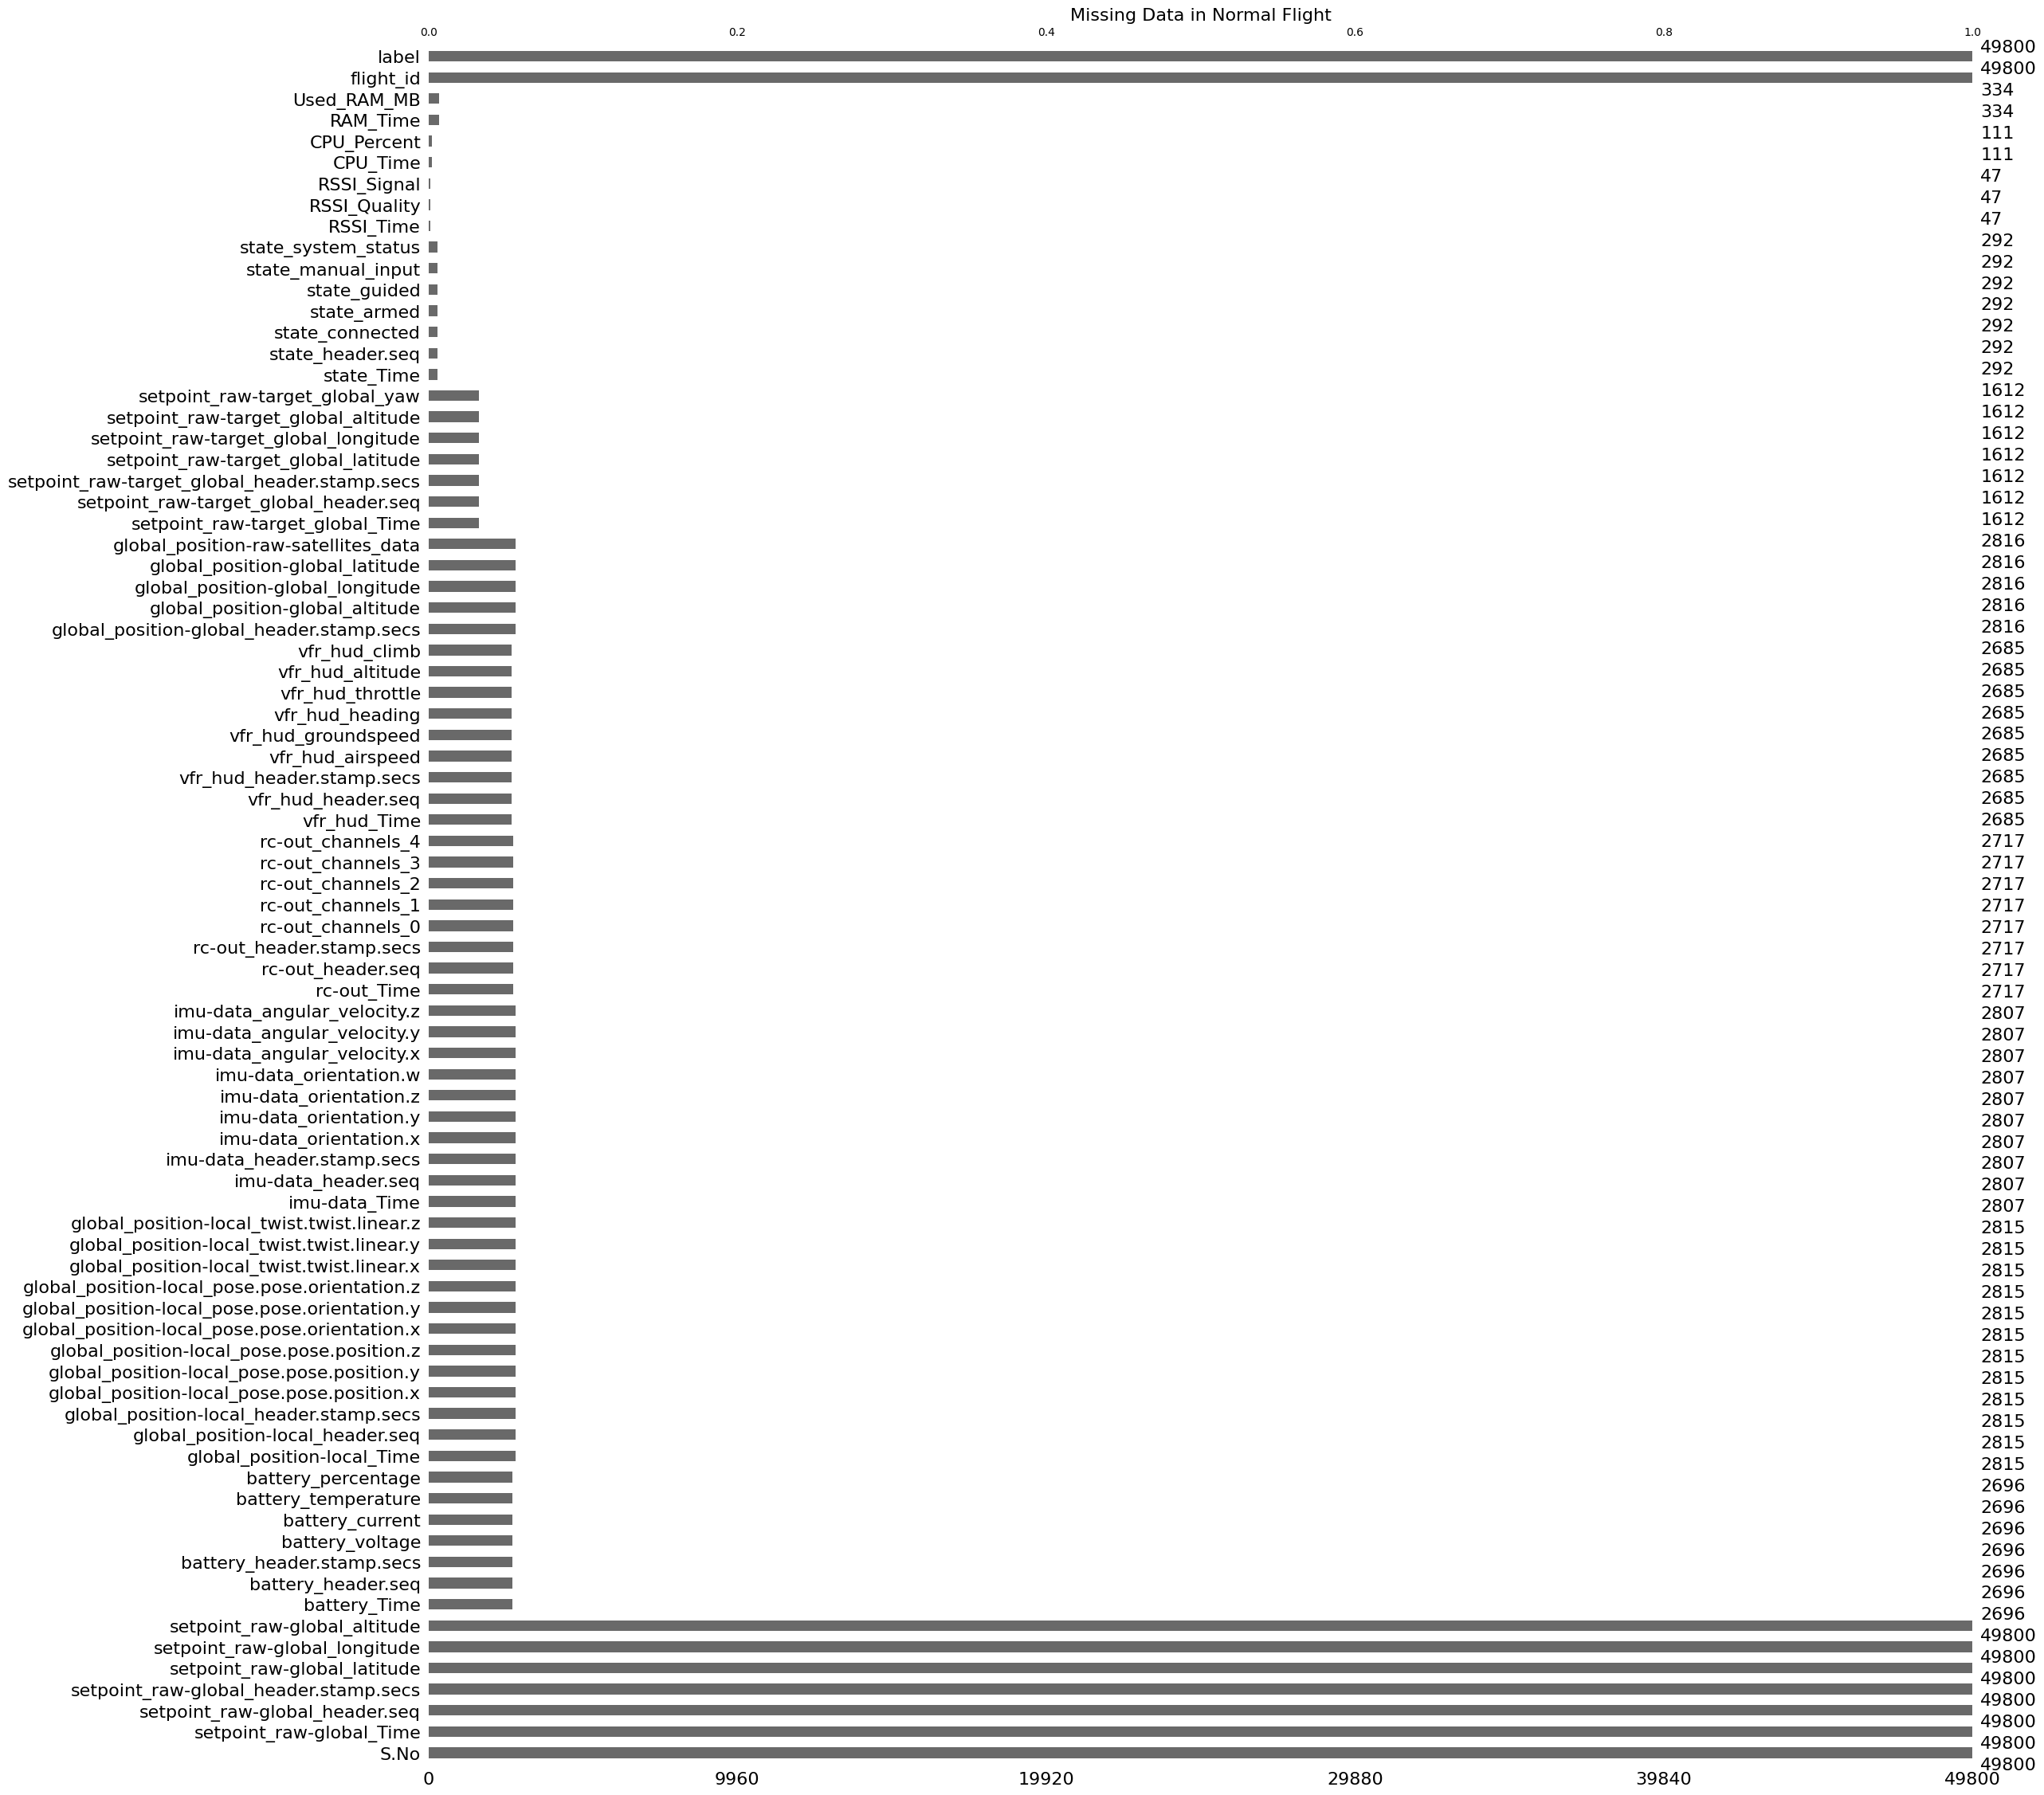

In [234]:
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(df_normal)
plt.title('Missing Data in Normal Flight', fontsize=16)
plt.show()

**Missing Values in Malfunction Data**

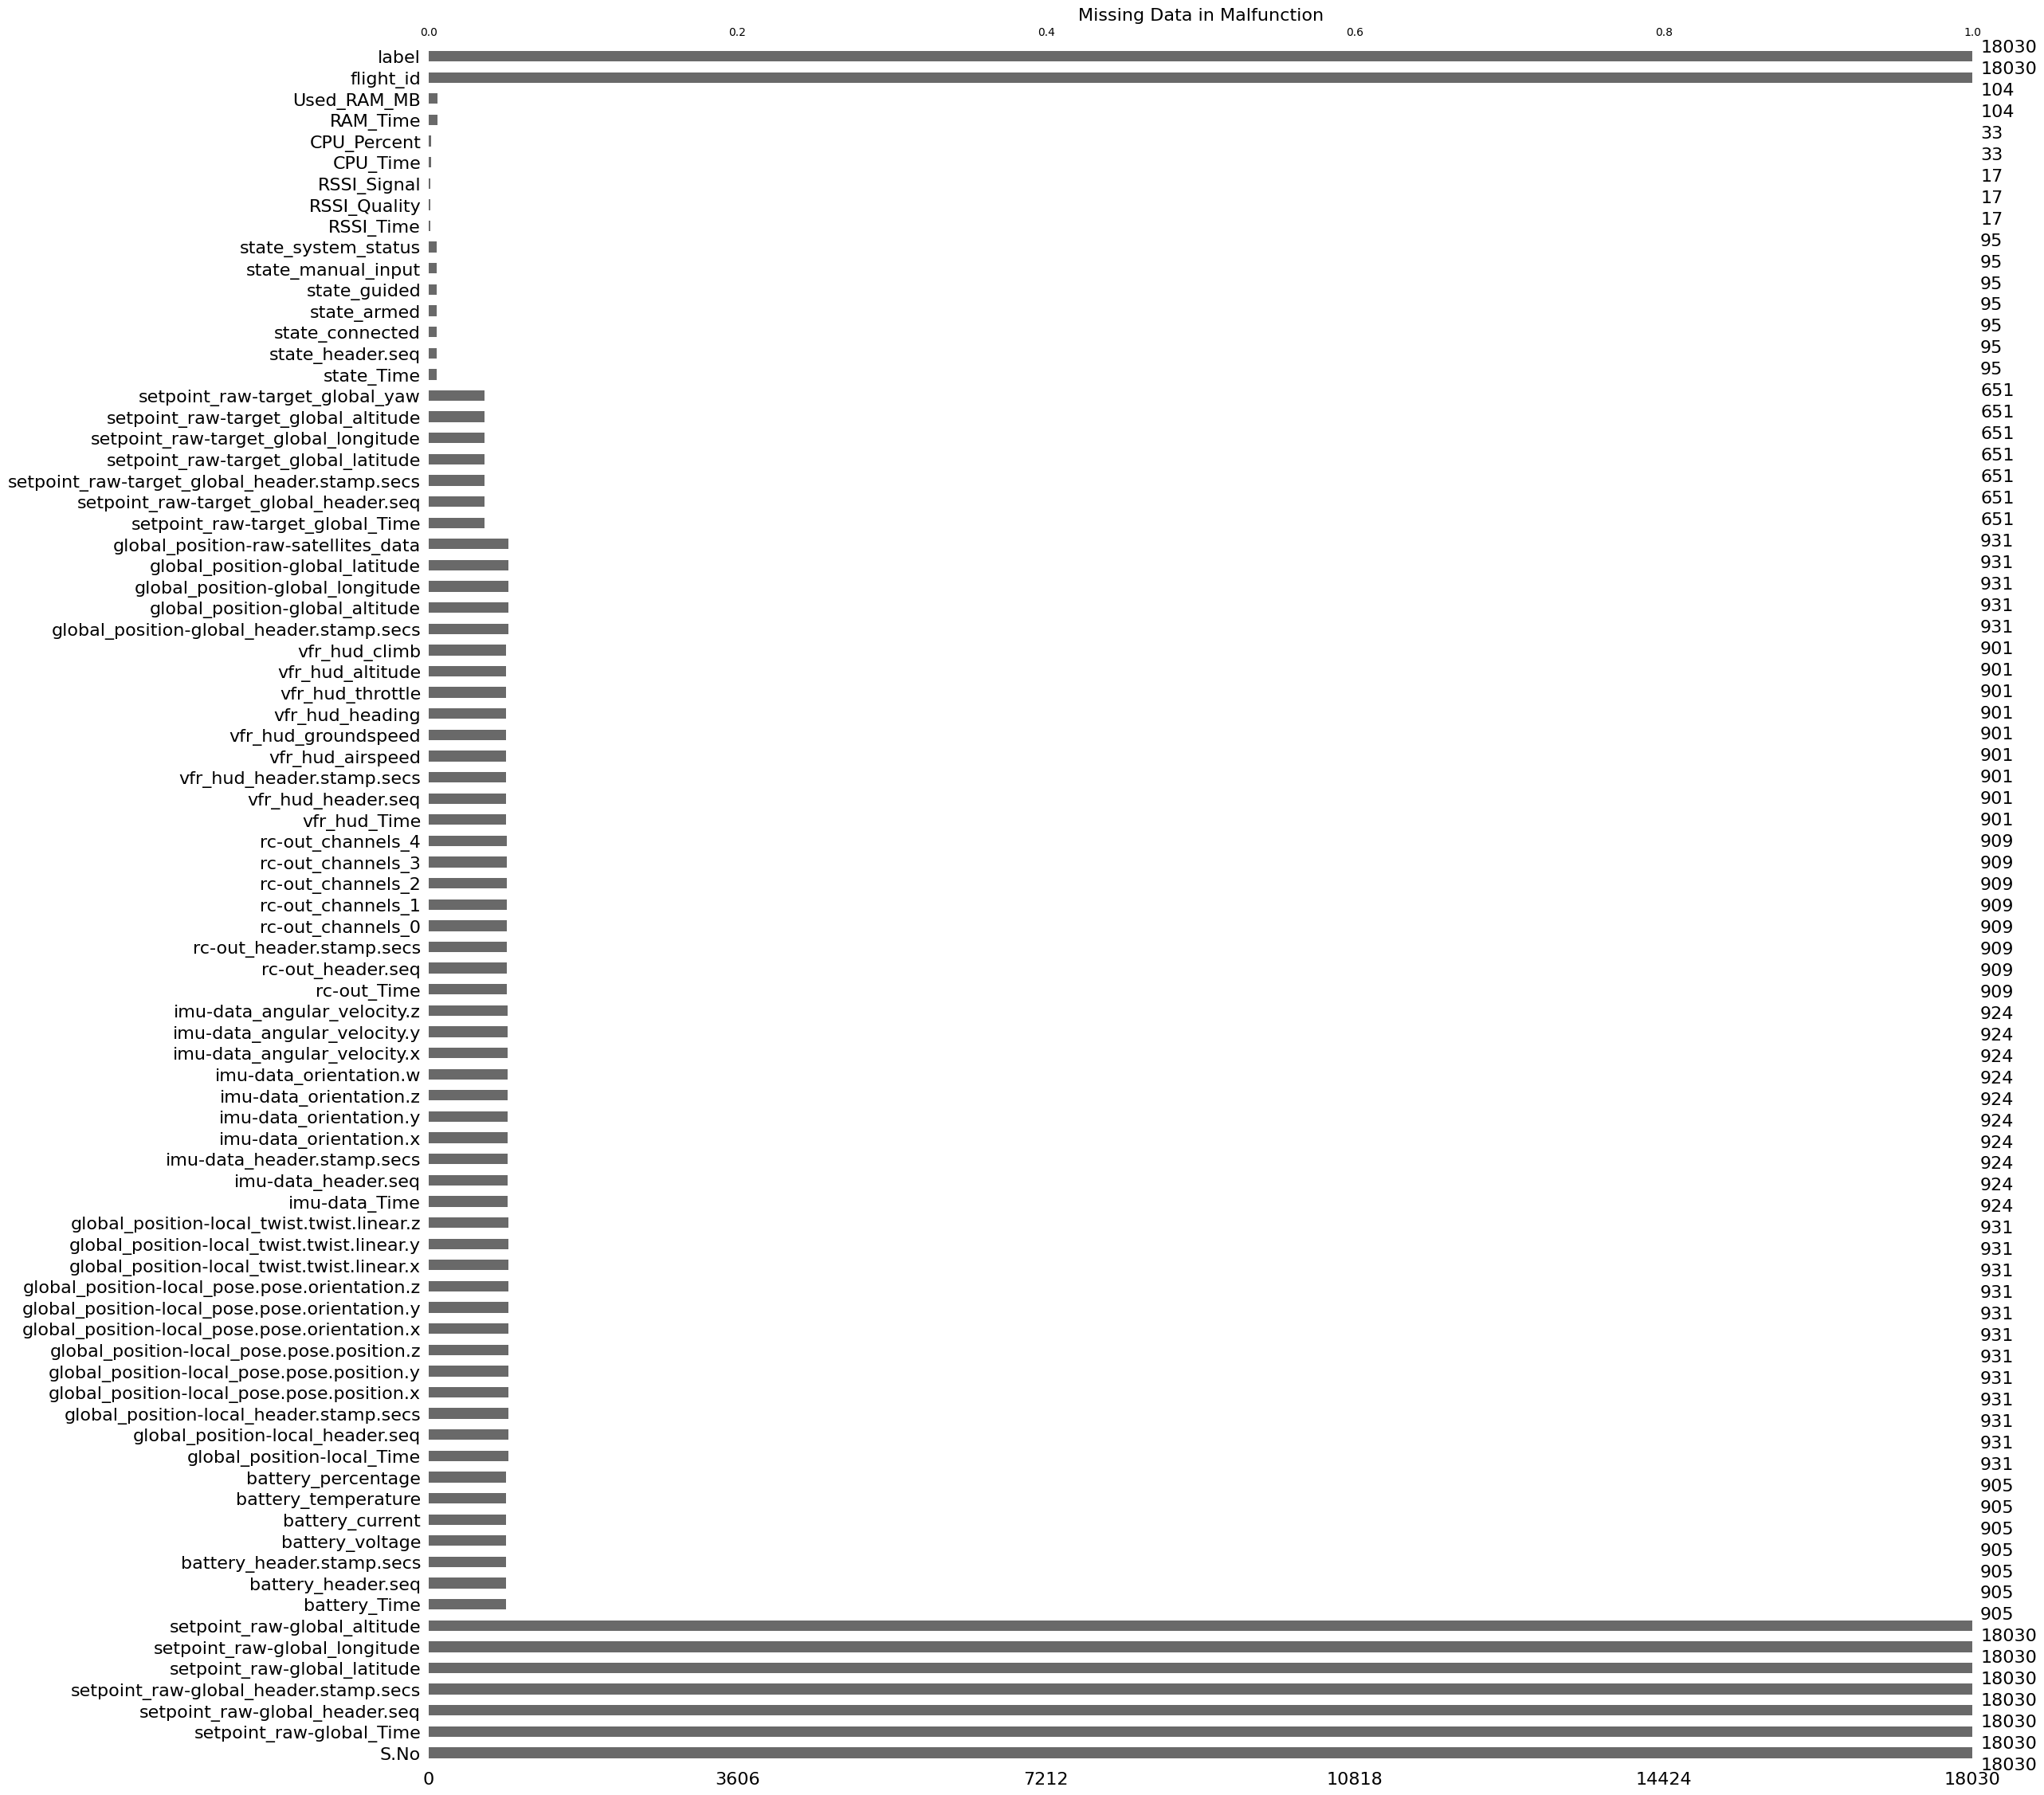

In [235]:
msno.bar(df_malfunction)
plt.title('Missing Data in Malfunction', fontsize=16)
plt.show()

**Missing Values in Dos Data**

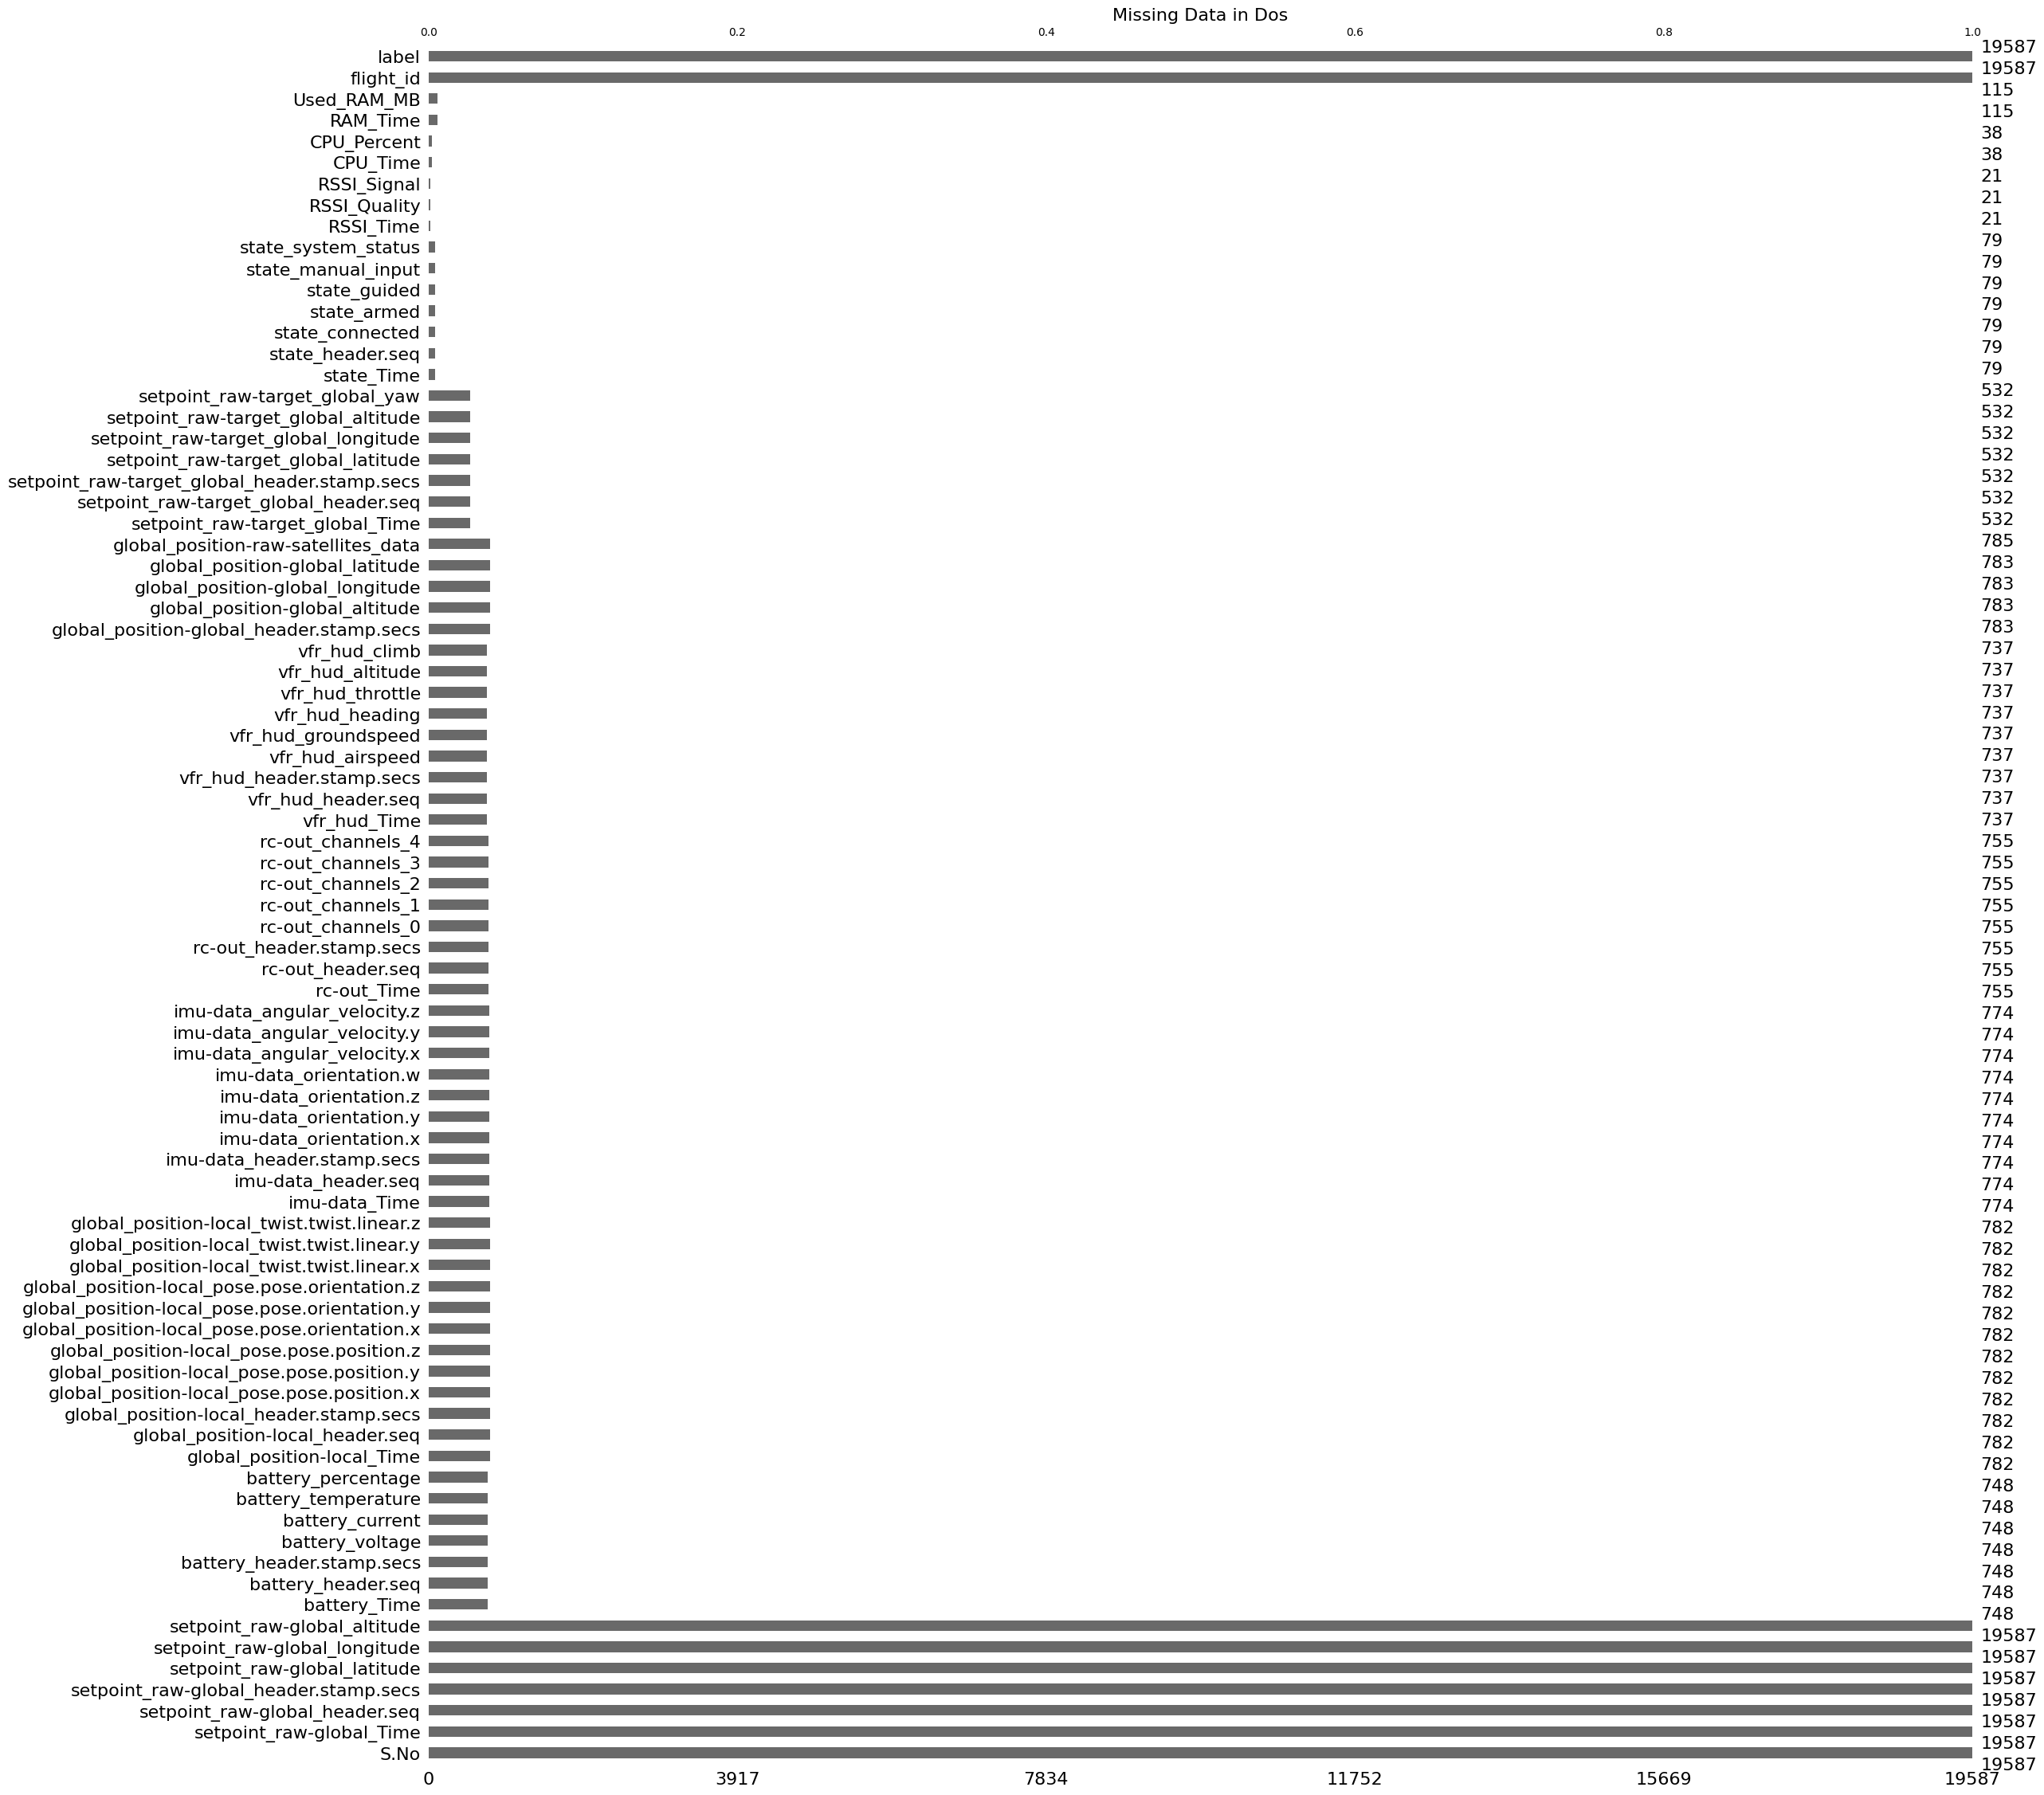

In [236]:
msno.bar(df_dos)
plt.title('Missing Data in Dos', fontsize=16)
plt.show()

**Observation:**

* These bar graphs show a lot of data sparsity. There are huge stretches of empty columns in many rows. However, this is normal behavior in asynchronous telemetry datasets.
* More than **95%** data only has setpoint information.

#### 1.2.2 Redundant Data Analysis



**Format Timestamps**

The timestamps in this dataset are in Unix epoch seconds. Before we move forward with null value handling, it is best to convert timestamps to DateTime objects.

In [237]:
def format_timestamp_cols(df):
  for col in df.columns:
    if col.endswith('Time') or col.endswith('secs'):
      # First check if any values are 0 or near 0
      mask = df[col].astype(float) < 1
      # Convert all
      df[col] = pd.to_datetime(df[col], unit='s', errors='coerce')
      # Set problematic ones to NaT
      df.loc[mask, col] = pd.NaT

In [238]:
format_timestamp_cols(df_drones)

In [239]:
df_drones.head()

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB,flight_id,label
0,0,2024-10-25 16:29:57.941646099,351,NaT,33.636576,72.991521,1.25,2024-10-25 16:29:40.918230295,8469.0,2024-10-25 16:29:40,...,5.0,2024-10-25 16:29:46.688935995,0.957143,-43.0,2024-10-25 16:29:46.592511892,6.2,2024-10-25 16:29:48.924926043,5.5,0,normal
1,1,2024-10-25 16:29:57.948842049,355,NaT,33.636576,72.991521,1.25,NaT,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaN,0,normal
2,2,2024-10-25 16:29:58.099756241,1648,NaT,33.636576,72.991521,1.25,NaT,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaN,0,normal
3,3,2024-10-25 16:29:58.107839823,1699,NaT,33.636576,72.991521,1.25,NaT,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaN,0,normal
4,4,2024-10-25 16:29:58.209521294,1826,NaT,33.636576,72.991521,1.25,NaT,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaN,0,normal


In [240]:
df_drones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87417 entries, 0 to 87416
Data columns (total 81 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   S.No                                           87417 non-null  int64         
 1   setpoint_raw-global_Time                       87417 non-null  datetime64[ns]
 2   setpoint_raw-global_header.seq                 87417 non-null  int64         
 3   setpoint_raw-global_header.stamp.secs          0 non-null      datetime64[ns]
 4   setpoint_raw-global_latitude                   87417 non-null  float64       
 5   setpoint_raw-global_longitude                  87417 non-null  float64       
 6   setpoint_raw-global_altitude                   87417 non-null  float64       
 7   battery_Time                                   4349 non-null   datetime64[ns]
 8   battery_header.seq                             4349 non-

##### List of Redundant Columns

In [241]:
# 1. Index/ID columns
cols_to_drop = ['S.No']

# 2. Redundant sequence numbers (all .seq columns)
cols_to_drop.extend([col for col in df_drones.columns if '.seq' in col])

# 3. Redundant timestamps (keep only _Time columns)
cols_to_drop.extend([col for col in df_drones.columns if 'stamp.secs' in col])

# 4. Redundant orientation (Using imu-data instead)
cols_to_drop.extend(['global_position-local_pose.pose.orientation.x',
'global_position-local_pose.pose.orientation.y',
'global_position-local_pose.pose.orientation.z',
# 5. Constant Value
'global_position-raw-satellites_data'])

##### Drop Redundant Columns

In [242]:
print(f"Original: {len(df_drones.columns)} columns")
cols_count_before = len(df_drones.columns)

# Drop Columns
df_drones = df_drones.drop(columns=cols_to_drop)

cols_count_after = len(df_drones.columns)
print(f"After drop: {len(df_drones.columns)} columns")
print(f"Dropped: {cols_count_before - cols_count_after} columns")

Original: 81 columns
After drop: 60 columns
Dropped: 21 columns


In [243]:
df_drones.columns

Index(['setpoint_raw-global_Time', 'setpoint_raw-global_latitude',
       'setpoint_raw-global_longitude', 'setpoint_raw-global_altitude',
       'battery_Time', 'battery_voltage', 'battery_current',
       'battery_temperature', 'battery_percentage',
       'global_position-local_Time',
       'global_position-local_pose.pose.position.x',
       'global_position-local_pose.pose.position.y',
       'global_position-local_pose.pose.position.z',
       'global_position-local_twist.twist.linear.x',
       'global_position-local_twist.twist.linear.y',
       'global_position-local_twist.twist.linear.z', 'imu-data_Time',
       'imu-data_orientation.x', 'imu-data_orientation.y',
       'imu-data_orientation.z', 'imu-data_orientation.w',
       'imu-data_angular_velocity.x', 'imu-data_angular_velocity.y',
       'imu-data_angular_velocity.z', 'rc-out_Time', 'rc-out_channels_0',
       'rc-out_channels_1', 'rc-out_channels_2', 'rc-out_channels_3',
       'rc-out_channels_4', 'vfr_hud_Time', '

#### 1.2.3 Null Values Imputation

To handle null values, Forward Fill (and backward fill where needed) will be applied. In my opinion, this imputation technique is better than Deletion and Interpolation for this data because:
* Deletion would discard 95% of our sparse data, losing critical anomaly signals
* Interpolation creates artificial smoothness that hide the abrupt changes making it difficult to detected cyberattacks and system failures.



In [248]:
def impute_drone_data(df):
    df = df.sort_values(['flight_id', 'setpoint_raw-global_Time']).copy()

    # 1. First, handle datetime columns with simpler approach
    datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

    for col in datetime_cols:
        # Simple forward/backward fill
        df[col] = df.groupby('flight_id')[col].ffill().bfill()

    # 2. Fill any remaining datetime NaTs with the most common timestamp
    primary_time = 'setpoint_raw-global_Time'
    for col in datetime_cols:
        if col != primary_time:
            df[col] = df[col].fillna(df[primary_time])

    # 3. Impute numeric sensor data
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'label' in numeric_cols:
        numeric_cols.remove('label')

    for col in numeric_cols:
        # Fill within flights
        filled = df.groupby('flight_id')[col].ffill().bfill()
        df[col] = filled.fillna(df[col].median())

    return df

df_drones = impute_drone_data(df_drones)

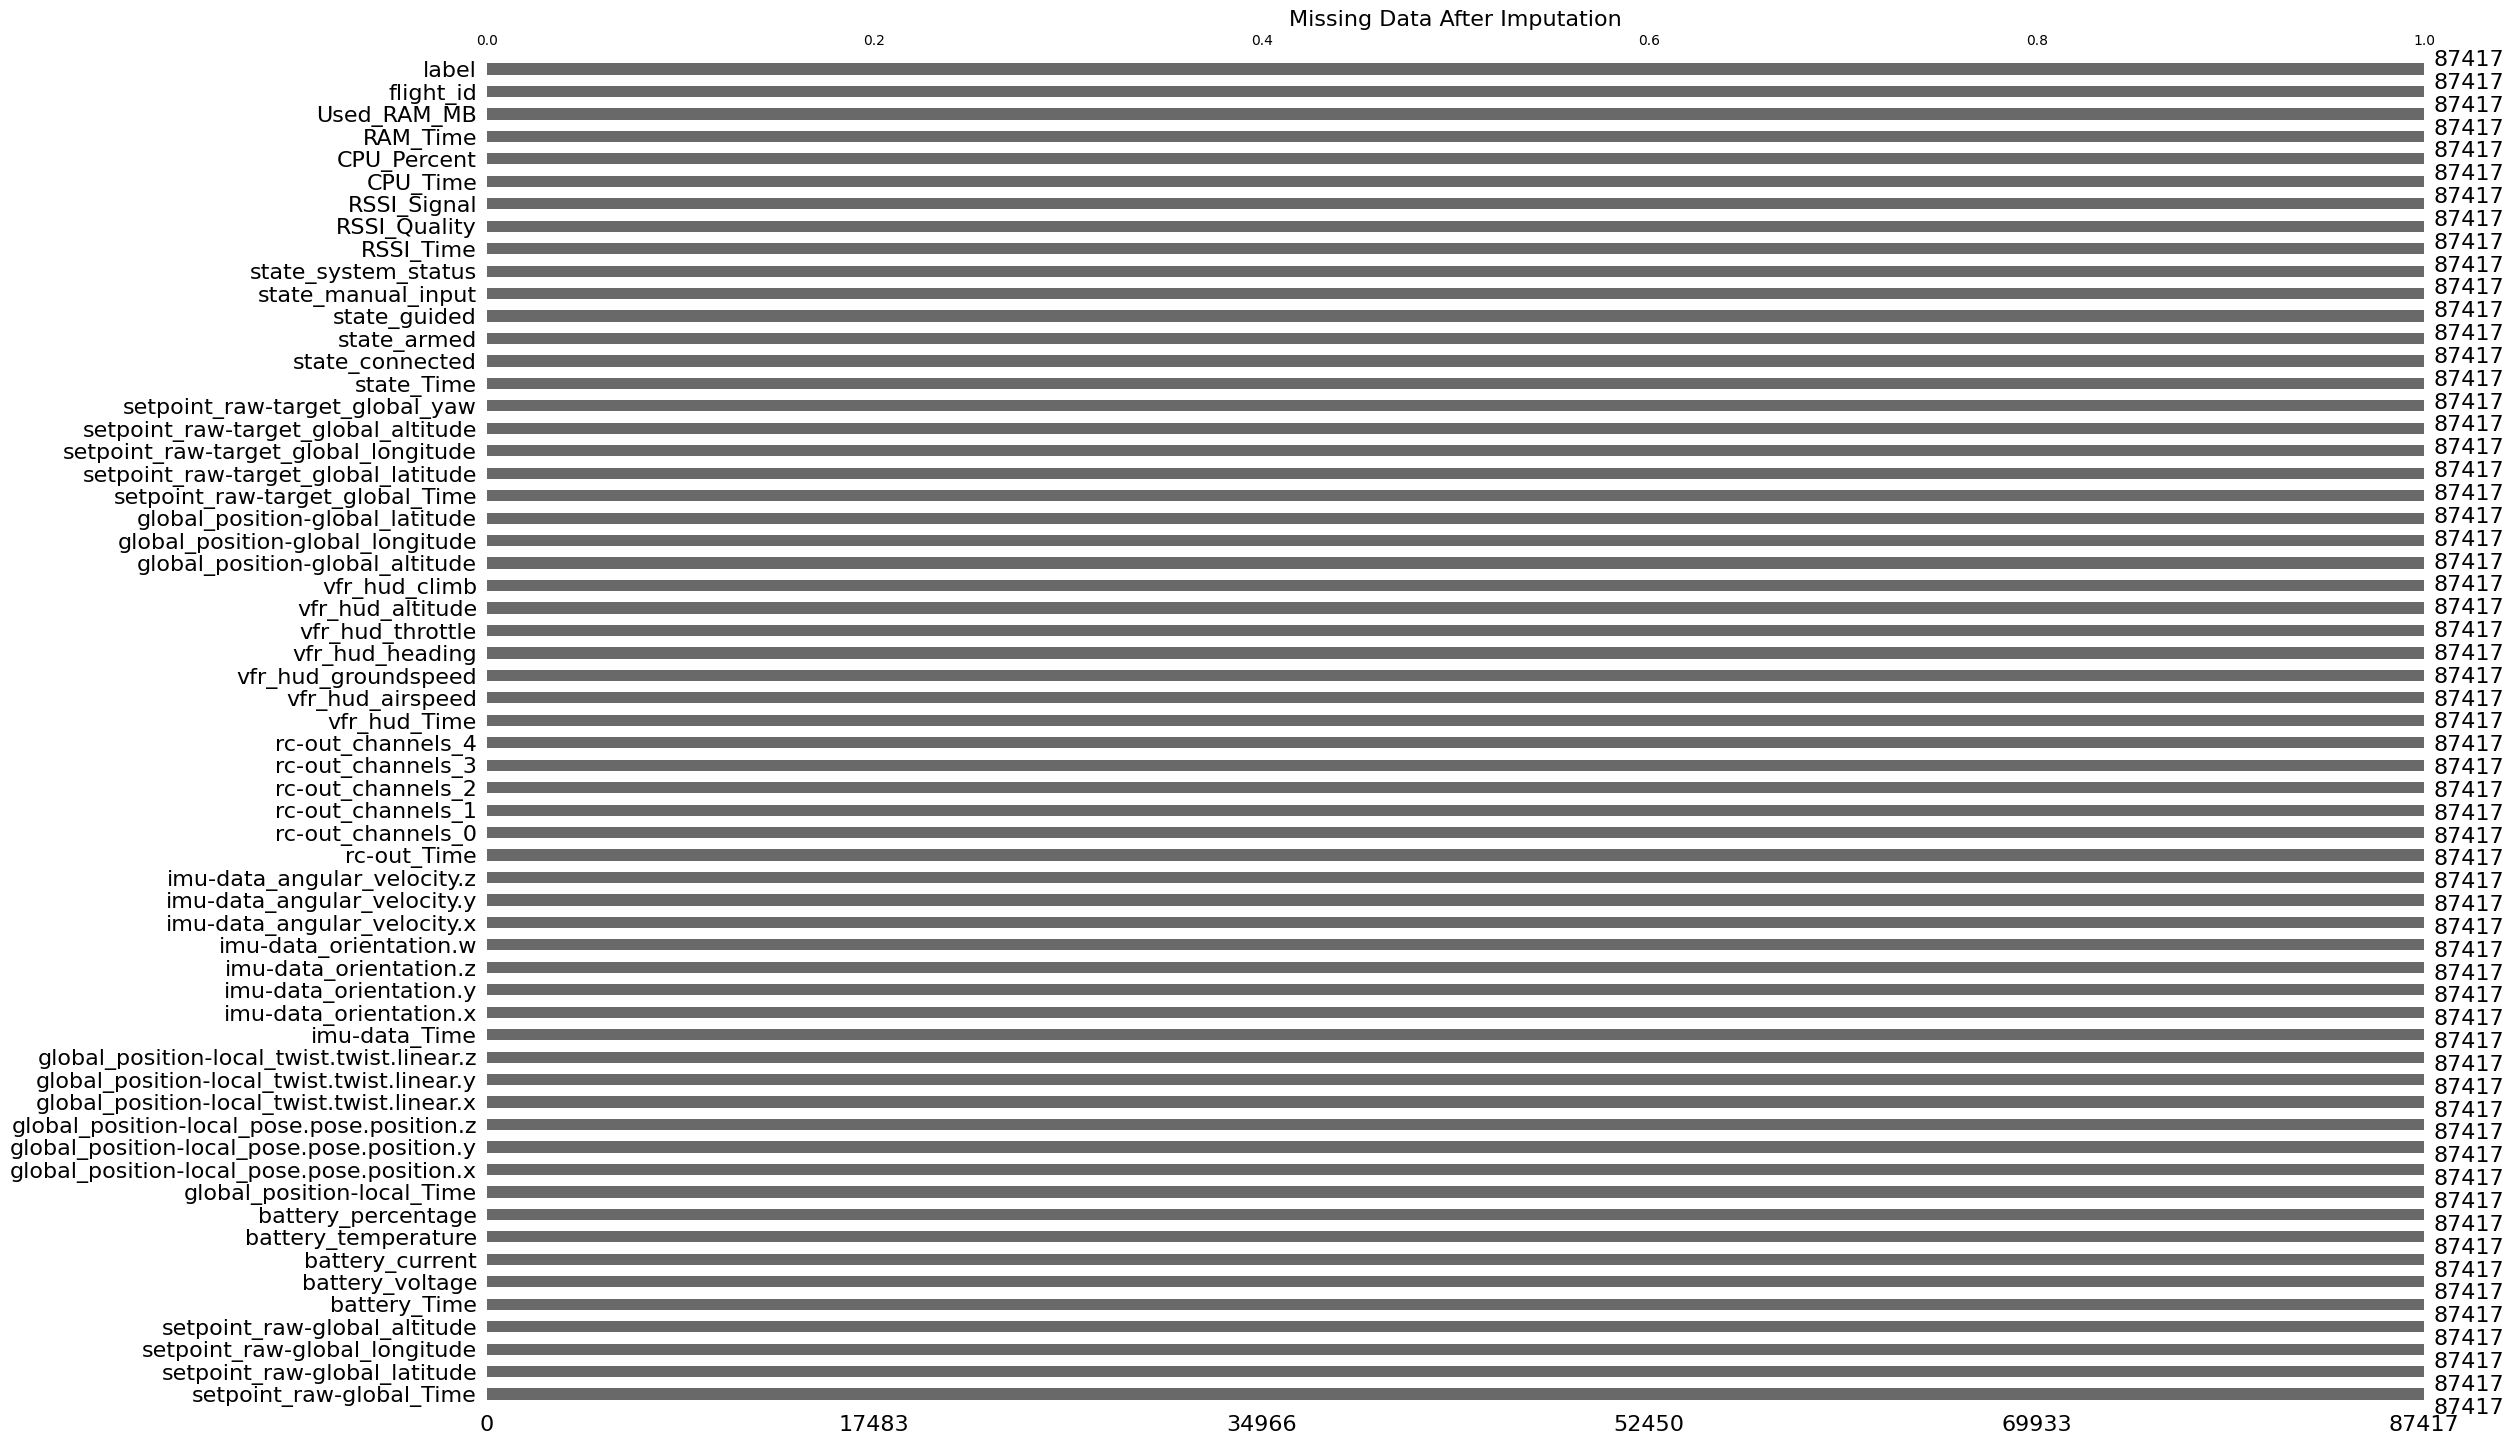

In [251]:
msno.bar(df_drones)
plt.title('Missing Data After Imputation', fontsize=16)
plt.show()

### 1.3 Feature Engineering

In [246]:
# Position error (distance to target)
df['position_error'] = np.sqrt(
    (df['global_position-local_pose.pose.position.x'] - df['setpoint_lat_converted_to_x'])**2 +
    (df['global_position-local_pose.pose.position.y'] - df['setpoint_long_converted_to_y'])**2 +
    (df['global_position-local_pose.pose.position.z'] - df['setpoint_raw-target_global_altitude'])**2
)

# Velocity magnitude
df['velocity_mag'] = np.sqrt(
    df['global_position-local_twist.twist.linear.x']**2 +
    df['global_position-local_twist.twist.linear.y']**2 +
    df['global_position-local_twist.twist.linear.z']**2
)

# GPS vs Local position difference (sensor disagreement)
df['gps_local_alt_diff'] = df['global_position-global_altitude'] - df['global_position-local_pose.pose.position.z']

NameError: name 'df' is not defined